In [90]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [91]:
import pandas as pd
from seminartools.data import read_inflation
from seminartools.models.pca_var_model import PCAVARModel

# 1. Read data

In [92]:
df_inflation = read_inflation()
df_inflation

,Country Code,IMF Country Code,Country,yearmonth,inflation
8537,ESP,184,Spain,1970-04-01,0.000000
11635,GTM,258,Guatemala,1970-04-01,0.012577
1231,AUS,193,Australia,1970-04-01,0.011236
7708,DOM,243,Dominican Republic,1970-04-01,-0.001604
21697,NZL,196,New Zealand,1970-04-01,0.015421
...,...,...,...,...,...
16098,KOR,542,"Korea, Rep.",2023-01-01,0.010538
15095,JPN,158,Japan,2023-01-01,0.004500
14347,ITA,136,Italy,2023-01-01,0.003938
21470,NOR,142,Norway,2023-01-01,0.006886


# 2. AR model per country

In [93]:
model = PCAVARModel(num_pcs=2, lags = [1, 2, 3, 4])
model

In [94]:
df_inflation

,Country Code,IMF Country Code,Country,yearmonth,inflation
8537,ESP,184,Spain,1970-04-01,0.000000
11635,GTM,258,Guatemala,1970-04-01,0.012577
1231,AUS,193,Australia,1970-04-01,0.011236
7708,DOM,243,Dominican Republic,1970-04-01,-0.001604
21697,NZL,196,New Zealand,1970-04-01,0.015421
...,...,...,...,...,...
16098,KOR,542,"Korea, Rep.",2023-01-01,0.010538
15095,JPN,158,Japan,2023-01-01,0.004500
14347,ITA,136,Italy,2023-01-01,0.003938
21470,NOR,142,Norway,2023-01-01,0.006886


In [95]:
df_inflation.pivot(
    index = "yearmonth",
    columns = "Country",
    values = "inflation"
)

Country,Argentina,Australia,Austria,Belgium,Canada,Colombia,Cyprus,Denmark,Dominican Republic,Fiji,...,Portugal,Singapore,South Africa,Spain,Sweden,Switzerland,Thailand,Turkey,United Kingdom,United States
yearmonth,,,,,,,,,,,,,,,,,,,,,
1970-04-01,0.028380,0.011236,0.008889,0.005236,0.000000,0.000000,0.004670,0.015152,-0.001604,0.003524,...,0.000000,-0.006706,0.058824,0.000000,0.015504,0.008982,-0.004678,0.012093,0.024390,0.016667
1970-07-01,0.034397,0.011111,0.013216,0.010417,0.012500,0.000000,0.021692,0.029851,-0.008031,0.007902,...,0.000000,0.008439,0.000000,0.042553,0.015267,0.011869,-0.000881,0.013470,0.011905,0.011216
1970-10-01,0.109245,0.021978,0.008696,0.005155,-0.006173,0.000000,0.006673,0.014493,0.016516,0.021777,...,0.058824,0.001674,0.000000,0.020408,0.015038,0.020528,-0.002352,0.041157,0.011765,0.013652
1971-01-01,0.093037,0.010753,0.012931,0.010256,0.006211,0.000000,0.008436,0.000000,-0.021344,0.027280,...,0.000000,0.016708,0.055556,0.020000,0.037037,0.020115,-0.000589,0.042001,0.034884,0.007576
1971-04-01,0.054657,0.010638,0.008511,0.015228,0.012346,0.000000,0.008366,0.021429,0.039714,0.004979,...,0.055556,-0.013147,0.000000,0.019608,0.000000,0.014085,-0.000295,0.049200,0.033708,0.010860
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-01,0.132548,0.021295,0.020300,0.033275,0.020211,0.037867,0.009326,0.021536,0.028900,0.034391,...,0.015094,0.016682,0.014892,0.020852,0.016158,0.007859,0.019048,0.282867,0.012270,0.022835
2022-04-01,0.182078,0.017376,0.031142,0.016949,0.031008,0.032018,0.049593,0.032997,0.022648,0.011465,...,0.050186,0.019820,0.023478,0.032860,0.032686,0.015595,0.023886,0.169374,0.036364,0.029738
2022-07-01,0.206391,0.017933,0.026846,0.025000,0.008354,0.024531,0.018325,0.023957,0.013293,0.007368,...,0.010619,0.019274,0.027957,0.012038,0.030796,0.006718,0.010083,0.088515,0.017544,0.013147


In [96]:
model.fit(df_inflation)

Text(0.5, 1.0, 'Fraction of variance explained by each principal component')

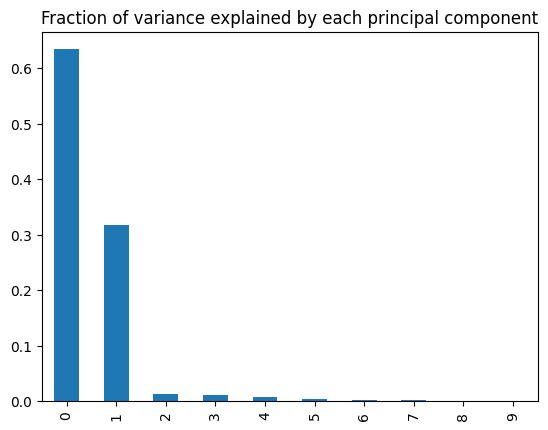

In [97]:
import matplotlib.pyplot as plt

pd.Series(model.all_eigenvalues).pipe(lambda x: x / x.sum()).head(10).plot.bar()
plt.title("Fraction of variance explained by each principal component")

In [98]:
(model.all_eigenvalues[0] + model.all_eigenvalues[1]) / sum(model.all_eigenvalues)

0.9524802651691595

PC1 and PC2 seem to combine 95% of the variance in inflation together.

<Axes: xlabel='Country'>

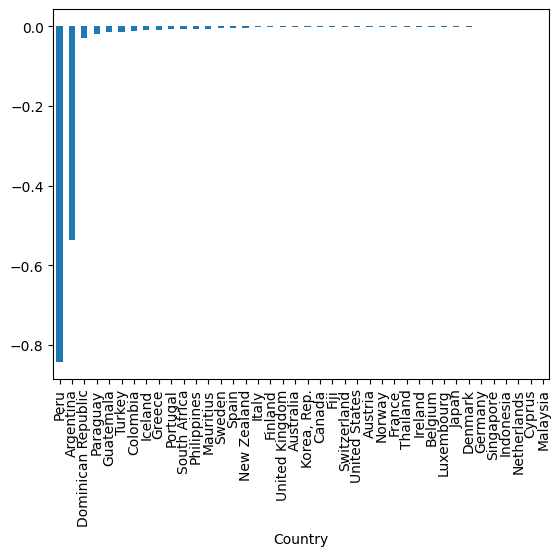

In [99]:
pd.Series(model.all_eigenvectors[:, 0], index = model.data_wide_columns).sort_values().plot.bar()

PC1 dominated by Peru and Argentina

# 3. Evaluation

In [100]:
df_inflation["Country"].unique()

array(['Spain', 'Guatemala', 'Australia', 'Dominican Republic',
       'New Zealand', 'Italy', 'Sweden', 'Colombia', 'Paraguay', 'Peru',
       'Belgium', 'Denmark', 'United States', 'Philippines', 'Indonesia',
       'Japan', 'Finland', 'Norway', 'Greece', 'Austria', 'South Africa',
       'France', 'Mauritius', 'Luxembourg', 'Switzerland', 'Singapore',
       'Malaysia', 'Fiji', 'Turkey', 'Netherlands', 'Korea, Rep.',
       'Thailand', 'Canada', 'Ireland', 'Germany', 'United Kingdom',
       'Portugal', 'Cyprus', 'Iceland', 'Argentina'], dtype=object)

In [101]:
preds = model.predict(df_inflation)
preds

,yearmonth,Country,inflation
8280,2023-04-01,Argentina,0.158492
8281,2023-04-01,Australia,0.000790
8282,2023-04-01,Austria,0.000413
8283,2023-04-01,Belgium,0.000348
8284,2023-04-01,Canada,0.000609
8285,2023-04-01,Colombia,0.002509
8286,2023-04-01,Cyprus,-0.000004
8287,2023-04-01,Denmark,0.000278
8288,2023-04-01,Dominican Republic,0.005631
8289,2023-04-01,Fiji,0.000583


# 4. H-period ahead forecasting

In [102]:
df_inflation

,Country Code,IMF Country Code,Country,yearmonth,inflation
8537,ESP,184,Spain,1970-04-01,0.000000
11635,GTM,258,Guatemala,1970-04-01,0.012577
1231,AUS,193,Australia,1970-04-01,0.011236
7708,DOM,243,Dominican Republic,1970-04-01,-0.001604
21697,NZL,196,New Zealand,1970-04-01,0.015421
...,...,...,...,...,...
16098,KOR,542,"Korea, Rep.",2023-01-01,0.010538
15095,JPN,158,Japan,2023-01-01,0.004500
14347,ITA,136,Italy,2023-01-01,0.003938
21470,NOR,142,Norway,2023-01-01,0.006886


In [103]:
from seminartools.models.utils import h_period_ahead_forecast

forecast = h_period_ahead_forecast(model, df_inflation, "2020-01-01", h=3)
forecast

,yearmonth,Country,inflation
0,2020-01-01,Argentina,0.134659
1,2020-01-01,Australia,0.000674
2,2020-01-01,Austria,0.000346
3,2020-01-01,Belgium,0.000306
4,2020-01-01,Canada,0.000510
...,...,...,...
515,2023-01-01,Switzerland,0.000377
516,2023-01-01,Thailand,0.000367
517,2023-01-01,Turkey,0.002395
518,2023-01-01,United Kingdom,0.000719


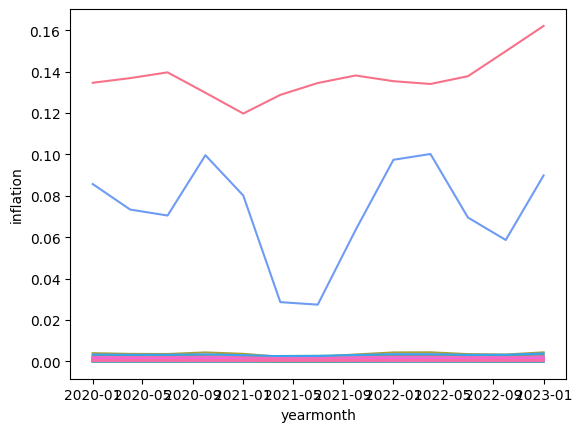

In [104]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(
    data = forecast,
    x = "yearmonth",
    y = "inflation",
    hue = "Country"
)
# turn off legend
plt.legend().remove()

# 5. Compare the forecast with the actual data

In [105]:
forecast_merged = forecast.copy().rename(columns={"inflation": "pred"})
forecast_merged = forecast_merged.merge(
    df_inflation[["Country", "yearmonth", "inflation"]],
    on=["Country", "yearmonth"],
    how="left",
).rename(columns={"inflation": "actual"})
forecast_merged.tail(100)

,yearmonth,Country,pred,actual
420,2022-07-01,"Korea, Rep.",0.000521,0.011352
421,2022-07-01,Luxembourg,0.000313,0.002584
422,2022-07-01,Malaysia,-0.000084,0.011845
423,2022-07-01,Mauritius,0.000829,0.023855
424,2022-07-01,Netherlands,0.000077,0.040519
...,...,...,...,...
515,2023-01-01,Switzerland,0.000377,0.010084
516,2023-01-01,Thailand,0.000367,0.000463
517,2023-01-01,Turkey,0.002395,0.116249
518,2023-01-01,United Kingdom,0.000719,0.008814


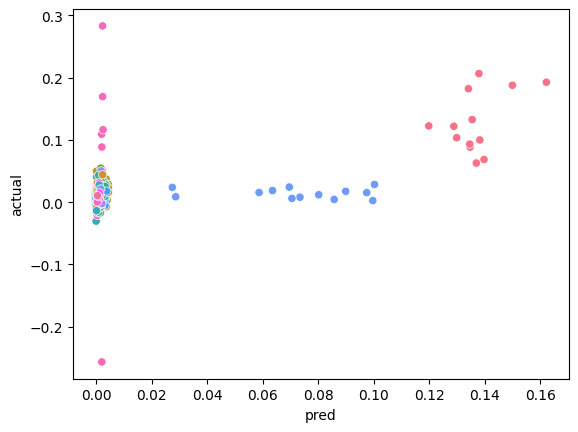

In [106]:
sns.scatterplot(
    data = forecast_merged,
    x = "pred",
    y = "actual",
    hue = "Country"
)
plt.legend().remove()

In [107]:
import statsmodels.api as sm

sm.OLS(
    forecast_merged["actual"], sm.add_constant(forecast_merged["pred"])
).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 actual   R-squared:                       0.296
Model:                            OLS   Adj. R-squared:                  0.294
Method:                 Least Squares   F-statistic:                     217.5
Date:                Tue, 12 Mar 2024   Prob (F-statistic):           2.34e-41
Time:                        20:12:22   Log-Likelihood:                 1178.1
No. Observations:                 520   AIC:                            -2352.
Df Residuals:                     518   BIC:                            -2344.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0106      0.001      9.314      0.000       0.008       0.013
pred           0.6744      0.046     14.749      0.000       0.585       0.764
==============================================================================
Omnibus:                      261.198   Durbin-Watson:                   1.805
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            63136.718
Skew:                           0.959   Prob(JB):                         0.00
Kurtosis:                      56.947   Cond. No.                         41.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [108]:
model.var.models["PC1"].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    PC1   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     70.57
Date:                Tue, 12 Mar 2024   Prob (F-statistic):           5.55e-54
Time:                        20:12:22   Log-Likelihood:                -61.398
No. Observations:                 208   AIC:                             140.8
Df Residuals:                     199   BIC:                             170.8
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0050      0.026      0.193      0.847      -0.046       0.056
PC1_lag_1      0.3954      0.055      7.187      0.000       0.287       0.504
PC2_lag_1     -0.0022      0.053     -0.042      0.967      -0.106       0.102
PC1_lag_2      0.1148      0.057      1.997      0.047       0.001       0.228
PC2_lag_2     -0.4451      0.053     -8.409      0.000      -0.549      -0.341
PC1_lag_3     -0.1577      0.054     -2.915      0.004      -0.264      -0.051
PC2_lag_3      0.2401      0.058      4.116      0.000       0.125       0.355
PC1_lag_4      0.3789      0.052      7.264      0.000       0.276       0.482
PC2_lag_4     -0.6245      0.058    -10.767      0.000      -0.739      -0.510
==============================================================================
Omnibus:                      165.191   Durbin-Watson:                   1.358
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5339.339
Skew:                          -2.592   Prob(JB):                         0.00
Kurtosis:                      27.273   Cond. No.                         4.68
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""